In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1000)
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip3 install yfinance --upgrade

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.54)


In [4]:
import yfinance as yf
dta=yf.download ("AMZN XOM JPM SBUX V KO MSFT AAPL GOOG BAC KHC KHC WMT RDS MAR IBM NVDA MA PYPL INTC F TOT",start="2009-01-01",end="2019-12-31")

[*********************100%***********************]  21 of 21 completed


In [5]:
amazon=dta['Adj Close']['AMZN']
EXXOM=dta['Adj Close']['XOM']
JPMorgan=dta['Adj Close']['JPM']
Visa=dta['Adj Close']['V']
starbucks=dta['Adj Close']['SBUX']
cocacola=dta['Adj Close']['KO']
microsoft=dta['Adj Close']['MSFT']
apple=dta['Adj Close']['AAPL']
google=dta['Adj Close']['GOOG']
BankOfAmerica=dta['Adj Close']['BAC']
#Heinz=dta['Adj Close']['KHC']
Walmart=dta['Adj Close']['WMT']
RoyalDutchShell=dta['Adj Close']['RDS']
Marriot=dta['Adj Close']['MAR']
IBM=dta['Adj Close']['IBM']
NVIDIA=dta['Adj Close']['NVDA']
Mastercard=dta['Adj Close']['MA']
Total=dta['Adj Close']['TOT']
Intel=dta['Adj Close']['INTC']
Ford=dta['Adj Close']['F']
#Hilton=dta['Adj Close']['HLT']
data=pd.DataFrame(amazon.values,columns=['AMZN'])
data['AMZN']=amazon.values
data['XOM']=EXXOM.values
data['JPM']=JPMorgan.values
data['V']=Visa.values
data['SBUX']=starbucks.values
data['KO']=cocacola.values
data['MFST']=microsoft.values
data['AAPL']=apple.values
data['GOOG']=google.values
data['BAC']=BankOfAmerica.values
#data['KHS']=Heinz.values
data['WMT']=Walmart.values
data['RDS']=RoyalDutchShell.values
data['MAR']=Marriot.values
data['IBM']=IBM.values
data['NVDA']=NVIDIA.values
data['MA']=Mastercard.values
data['TOT']=Total.values
data['INTC']=Intel.values
data['F']=Ford.values
#data['HLT']=Hilton.values

In [6]:
data.head()

,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
0,51.279999,54.616432,23.811602,10.489130,3.993688,14.164658,14.868458,10.555326,153.250580,12.424986,42.215157,NaN,15.830873,59.010853,7.424072,11.650519,29.589779,10.296615,1.612436
1,54.360001,55.854805,23.964485,10.687111,4.154112,14.361784,15.549164,11.223147,160.060059,12.645598,43.058563,3.89,16.327370,61.261627,8.012848,12.208875,30.799044,10.675894,1.732136
2,54.060001,55.847931,22.359205,10.763107,4.187884,14.217845,15.694486,11.696809,163.412491,12.336741,42.561550,4.05,16.937811,60.875973,8.160039,12.492537,30.269320,10.472207,1.816630
3,57.360001,54.938007,22.840784,11.521043,4.314535,13.989439,15.878043,11.503882,166.406265,12.601477,42.185043,3.92,17.605228,62.565826,8.436028,13.206583,30.114136,10.795296,1.943372
4,56.200001,53.535503,21.472479,11.271065,4.217435,14.058273,14.921995,11.255305,160.403763,12.098475,41.823578,4.41,16.221558,61.556126,7.930050,12.511368,29.348984,10.142094,1.894083


In [7]:
price=data.dropna()

In [8]:
daily_returns=(data / data.shift(1)-1).dropna()
daily_returns

,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
2,-0.005519,-0.000123,-0.066986,0.007111,0.008130,-0.010022,0.009346,0.042204,0.020945,-0.024424,-0.011543,0.041131,0.037388,-0.006295,0.018369,0.023234,-0.017199,-0.019079,0.048780
3,0.061043,-0.016293,0.021538,0.070420,0.030242,-0.016065,0.011696,-0.016494,0.018320,0.021459,-0.008846,-0.032099,0.039404,0.027759,0.033822,0.057158,-0.005127,0.030852,0.069767
4,-0.020223,-0.025529,-0.059906,-0.021698,-0.022505,0.004920,-0.060212,-0.021608,-0.036071,-0.039916,-0.008569,0.125000,-0.078594,-0.016138,-0.059978,-0.052642,-0.025408,-0.060508,-0.025362
5,0.017082,0.010734,-0.030972,-0.010646,0.015015,0.006899,0.031266,0.018569,0.009875,-0.012399,-0.074901,-0.061224,0.026092,-0.006948,-0.025522,0.004669,0.020419,0.007618,0.000000
6,-0.028866,-0.019219,-0.045922,-0.002511,-0.036489,-0.014147,-0.029821,-0.022869,-0.031120,-0.040620,0.003893,0.072464,-0.040098,-0.028447,-0.055952,-0.017934,-0.041629,-0.027491,-0.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,-0.009205,-0.001694,0.001202,-0.008552,-0.006795,-0.001316,-0.006014,0.001251,0.002498,-0.002937,-0.000750,0.000000,-0.015392,0.008014,0.019994,-0.005456,0.011163,0.000289,0.005634
2177,-0.005793,-0.003655,-0.001636,0.000388,-0.002589,-0.002855,-0.000413,-0.004438,-0.006170,0.003367,-0.020260,0.000000,-0.004779,0.005628,-0.003679,-0.000826,-0.005036,0.001443,0.000000
2178,-0.007549,0.005109,0.004043,0.001260,0.007787,0.003524,0.001788,0.003705,-0.005851,-0.002936,0.003702,0.000000,0.007103,0.005597,-0.008354,-0.001579,0.005451,-0.001152,0.010271
2179,0.000804,-0.003259,-0.003156,0.004161,0.000736,-0.003292,0.000137,0.010071,-0.002271,-0.002103,-0.007631,0.000000,0.000497,-0.008557,0.007081,0.008286,0.002711,-0.000577,-0.002773


In [9]:
a=np.asmatrix(daily_returns)

In [10]:
daily_returns.columns

Index(['AMZN', 'XOM', 'JPM', 'V', 'SBUX', 'KO', 'MFST', 'AAPL', 'GOOG', 'BAC',
       'WMT', 'RDS', 'MAR', 'IBM', 'NVDA', 'MA', 'TOT', 'INTC', 'F'],
      dtype='object')

### Hierarchical Clustering

In [11]:
# correlation matrix
corr = daily_returns.corr()

In [12]:
corr

,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
AMZN,1.000000,0.339560,0.332980,0.409147,0.430024,0.290602,0.435573,0.346626,0.510205,0.297383,0.187498,-0.002797,0.400600,0.365693,0.315699,0.414617,0.358822,0.337555,0.354262
XOM,0.339560,1.000000,0.550644,0.425152,0.408771,0.507174,0.503400,0.384975,0.423950,0.443039,0.315323,-0.019966,0.533308,0.540211,0.359194,0.464727,0.722026,0.505557,0.489713
JPM,0.332980,0.550644,1.000000,0.490149,0.430059,0.387570,0.481375,0.392673,0.446885,0.825658,0.265654,0.011445,0.557719,0.532474,0.378399,0.513302,0.568424,0.493171,0.505066
V,0.409147,0.425152,0.490149,1.000000,0.447092,0.348371,0.415238,0.375914,0.450164,0.448239,0.250710,0.023710,0.468724,0.407749,0.390391,0.802034,0.439521,0.400740,0.393285
SBUX,0.430024,0.408771,0.430059,0.447092,1.000000,0.398107,0.473031,0.415687,0.462545,0.392541,0.313640,0.008460,0.567139,0.423762,0.383410,0.468834,0.411983,0.426364,0.464257
KO,0.290602,0.507174,0.387570,0.348371,0.398107,1.000000,0.438014,0.326400,0.351881,0.296996,0.375381,0.034951,0.489414,0.458942,0.277893,0.374564,0.479632,0.411453,0.361242
MFST,0.435573,0.503400,0.481375,0.415238,0.473031,0.438014,1.000000,0.417066,0.508898,0.431666,0.303469,0.012128,0.503526,0.520365,0.445915,0.451625,0.503569,0.609849,0.459214
AAPL,0.346626,0.384975,0.392673,0.375914,0.415687,0.326400,0.417066,1.000000,0.467588,0.371036,0.214010,-0.018368,0.447425,0.417807,0.369895,0.432976,0.393991,0.428288,0.383951
GOOG,0.510205,0.423950,0.446885,0.450164,0.462545,0.351881,0.508898,0.467588,1.000000,0.419026,0.237931,-0.012113,0.453346,0.430389,0.389026,0.469406,0.437889,0.411593,0.371268
BAC,0.297383,0.443039,0.825658,0.448239,0.392541,0.296996,0.431666,0.371036,0.419026,1.000000,0.215306,0.019403,0.510094,0.452008,0.346070,0.474675,0.483161,0.424689,0.465750


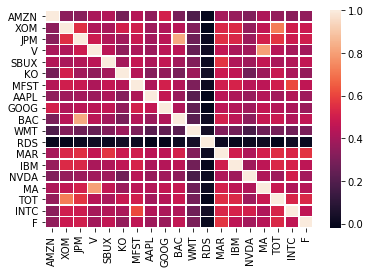

In [13]:
ax = sns.heatmap(corr, linewidth=0.5)
plt.show()

In [14]:
# distance matrix
d_corr = np.sqrt(0.5*(1-corr))

In [15]:
d_corr

,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
AMZN,0.000000,0.574648,0.577503,0.543532,0.533843,0.595566,0.531238,0.571565,0.494871,0.592713,0.637378,0.708095,0.547448,0.563164,0.584936,0.541010,0.566206,0.575520,0.568216
XOM,0.574648,0.000000,0.474002,0.536120,0.543704,0.496400,0.498297,0.554538,0.536680,0.527713,0.585097,0.714131,0.483059,0.479473,0.566042,0.517336,0.372810,0.497214,0.505118
JPM,0.577503,0.474002,0.000000,0.504902,0.533826,0.553367,0.509227,0.551057,0.525887,0.295248,0.605948,0.703049,0.470256,0.483491,0.557495,0.493304,0.464530,0.503403,0.497460
V,0.543532,0.536120,0.504902,0.000000,0.525789,0.570802,0.540723,0.558608,0.524326,0.525243,0.612083,0.698674,0.515401,0.544174,0.552091,0.314615,0.529376,0.547384,0.550779
SBUX,0.533843,0.543704,0.533826,0.525789,0.000000,0.548586,0.513308,0.540515,0.518389,0.551117,0.585816,0.704109,0.465221,0.536767,0.555243,0.515348,0.542225,0.535554,0.517563
KO,0.595566,0.496400,0.553367,0.570802,0.548586,0.000000,0.530087,0.580345,0.569262,0.592876,0.558847,0.694640,0.505265,0.520124,0.600877,0.559212,0.510083,0.542470,0.565136
MFST,0.531238,0.498297,0.509227,0.540723,0.513308,0.530087,0.000000,0.539877,0.495531,0.533073,0.590140,0.702806,0.498234,0.489711,0.526348,0.523629,0.498212,0.441674,0.519993
AAPL,0.571565,0.554538,0.551057,0.558608,0.540515,0.580345,0.539877,0.000000,0.515952,0.560787,0.626893,0.713571,0.525630,0.539534,0.561295,0.532459,0.550459,0.534655,0.554999
GOOG,0.494871,0.536680,0.525887,0.524326,0.518389,0.569262,0.495531,0.515952,0.000000,0.538968,0.617280,0.711377,0.522807,0.533672,0.552709,0.515070,0.530146,0.542405,0.560684
BAC,0.592713,0.527713,0.295248,0.525243,0.551117,0.592876,0.533073,0.560787,0.538968,0.000000,0.626376,0.700213,0.494927,0.523446,0.571809,0.512506,0.508350,0.536335,0.516841


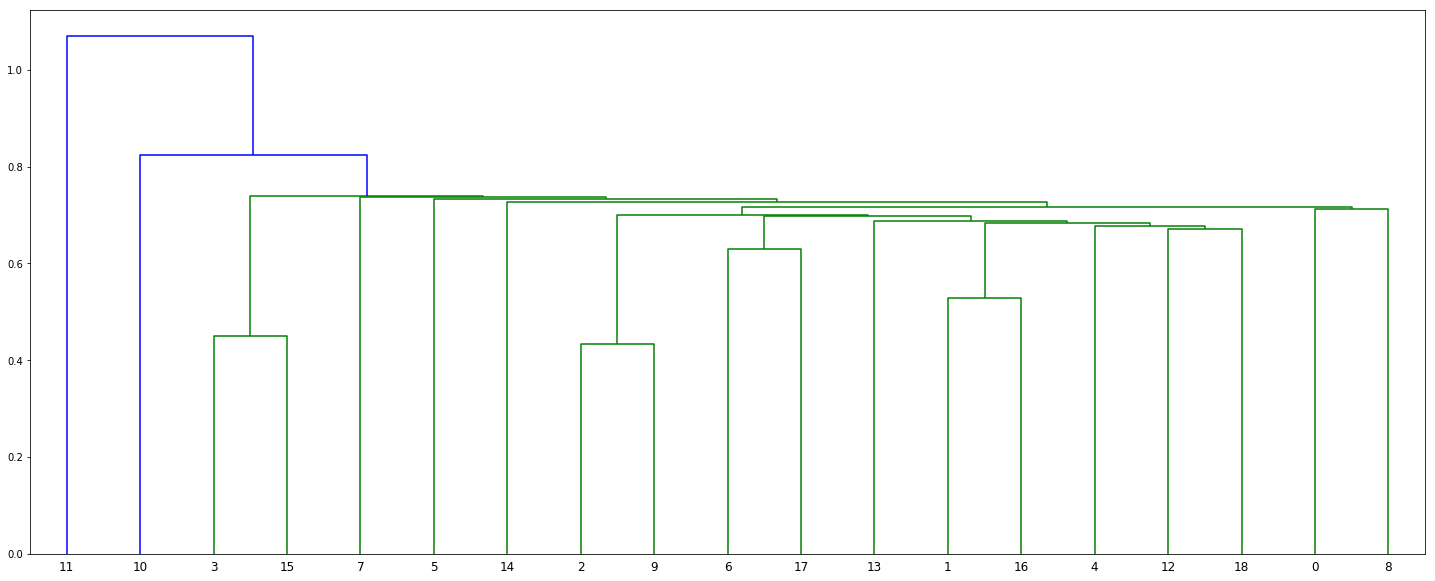

In [16]:
link = linkage(d_corr, 'single') #using the single linkage for clustering
Z = pd.DataFrame(link)

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z) #plotting the dendrogram
# plt.show()

In [17]:
link

array([[ 2.        ,  9.        ,  0.43260985,  2.        ],
       [ 3.        , 15.        ,  0.44956618,  2.        ],
       [ 1.        , 16.        ,  0.52902438,  2.        ],
       [ 6.        , 17.        ,  0.62981855,  2.        ],
       [12.        , 18.        ,  0.67025258,  2.        ],
       [ 4.        , 23.        ,  0.67718772,  3.        ],
       [21.        , 24.        ,  0.68403225,  5.        ],
       [13.        , 25.        ,  0.68831594,  6.        ],
       [22.        , 26.        ,  0.69739273,  8.        ],
       [19.        , 27.        ,  0.70065075, 10.        ],
       [ 0.        ,  8.        ,  0.71310158,  2.        ],
       [28.        , 29.        ,  0.71662311, 12.        ],
       [14.        , 30.        ,  0.72571677, 13.        ],
       [ 5.        , 31.        ,  0.73379095, 14.        ],
       [ 7.        , 32.        ,  0.7379005 , 15.        ],
       [20.        , 33.        ,  0.73948176, 17.        ],
       [10.        , 34.

### Quasi-diagonalisation

In [27]:
def get_quasi_diag(link):
    
    # sort clustered items by distance
    
    link = link.astype(int)
    
    # get the first and the second item of the last tuple
    sort_ix = pd.Series([link[-1,0], link[-1,1]]) 
    
    # the total num of items is the third item of the last list
    num_items = link[-1, 3]
    
    # if the max of sort_ix is bigger than or equal to the max_items
    while sort_ix.max() >= num_items:
        # assign sort_ix index
        sort_ix.index = range(0, sort_ix.shape[0]*2, 2) # odd numbers as index
        
        df0 = sort_ix[sort_ix >= num_items] # find clusters
        
        # df0 contain even index and cluster index
        i = df0.index
        j = df0.values - num_items # 
        
        sort_ix[i] = link[j,0] # item 1
        
        df0  = pd.Series(link[j, 1], index=i+1)
        
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        
        sort_ix.index = range(sort_ix.shape[0])
        
    
    return sort_ix.tolist()

In [19]:
sort_ix=get_quasi_diag(link)
sort_ix

[11, 10, 3, 15, 7, 5, 14, 2, 9, 6, 17, 13, 1, 16, 4, 12, 18, 0, 8]

### Recursive bisection

In [28]:
### This part uses De Lopez Recursive bisection technique ###
### ADVANCES IN FINANCIAL MACHINE LEARNING, LOPEZ, PAGE 230 ###

def get_cluster_var(cov, c_items):
    cov_ = cov.iloc[c_items, c_items] # matrix slice
    # calculate the inverse-variance portfolio
    ivp = 1./np.diag(cov_)
    ivp/=ivp.sum()
    w_ = ivp.reshape(-1,1)
    c_var = np.dot(np.dot(w_.T, cov_), w_)[0,0]
    return c_var
def get_rec_bipart(cov, sort_ix):
    # compute HRP allocation
    # intialize weights of 1
    w = pd.Series(1, index=sort_ix)
    
    # intialize all items in one cluster
    c_items = [sort_ix]
    while len(c_items) > 0:
        # bisection
        
        c_items = [i[int(j):int(k)] for i in c_items for j,k in 
                   ((0,len(i)/2),(len(i)/2,len(i))) if len(i)>1]
        
        # now it has 2
        for i in range(0, len(c_items), 2):
            
            c_items0 = c_items[i] # cluster 1
            c_items1 = c_items[i+1] # cluter 2
            
            c_var0 = get_cluster_var(cov, c_items0)
            c_var1 = get_cluster_var(cov, c_items1)
            
            alpha = 1 - c_var0/(c_var0+c_var1)
            
            w[c_items0] *= alpha
            w[c_items1] *=1-alpha
    return w

In [29]:
cov = daily_returns.cov()
weights = get_rec_bipart(cov, sort_ix)

In [30]:
new_index = [daily_returns.columns[i] for i in weights.index]
weights.index = new_index

In [31]:
weights
allocations=round(weights, 6)
allocations

RDS     0.000000
WMT     0.198127
V       0.049273
MA      0.041767
AAPL    0.059410
KO      0.170347
NVDA    0.022420
JPM     0.020496
BAC     0.010147
MFST    0.054882
INTC    0.049908
IBM     0.074622
XOM     0.047399
TOT     0.023828
SBUX    0.045072
MAR     0.038534
F       0.037363
AMZN    0.020811
GOOG    0.035595
dtype: float64

In [32]:
sum(weights)

1.0000000000000002

In [33]:
np.mean(allocations)

0.05263163157894737

In [34]:
np.std(allocations)

0.048594163166080284